<div style="text-align: center; font-size: 20px;"><b>Stats216v: Statistical Learning</b></div>

<br>
<div style="text-align: center">Stanford University</div>
<div style="text-align: center">Summer 2017</div>
<div style="text-align: center">Gyu-Ho Lee (<a href="mailto:gyuhox@gmail.com">gyuhox@gmail.com</a>)</div>

###### Q1.

Suppose you have collected a dataset of information about 40 patients, ages 55 to 60 years old. You have variables $X_{1}$ = weight, $X_{2}$ = years they have smoked, and $Y$ = whether or not they have had a heart attack. You fit a logistic regression model, which yields the following coefficients: $\hat{β}_{0} = −3.8$, $\hat{β}_{1} = 0.007$, $\hat{β}_{2} = 0.03$.

(a) Estimate the probability that a new patient who weighs 143 lbs and has smoked for 17 years will have a heart attack.

<span style="color:blue">
Gyu-Ho's Answer: 0.09203808291997737.
</span>

<span style="color:blue">
Logistic regression would be in $P(X) = \frac{e^{β_{0} + β_{1}*X_{1} + β_{2}*X_{2}}}{1 + e^{β_{0} + β_{1}*X_{1} + β_{2}*X_{2}}} = \frac{e^{-3.8 + 0.007*143 + 0.03*17}}{1 + e^{-3.8 + 0.007*143 + 0.03*17}} = 0.09203808291997737$
</span>

(b) Suppose a patient does not smoke: $X_{2}$ = 0. At what weight would we predict the chance of having a heart attack is 10%?

<span style="color:blue">
Gyu-Ho's Answer: 228.96791752339718.
</span>

<span style="color:blue">
$\frac{e^{-3.8 + 0.007*X_{1}}}{1 + e^{-3.8 + 0.007*X_{1}}} = \frac{e^{-3.8 + 0.007*228.96791752339718}}{1 + e^{-3.8 + 0.007*228.96791752339718}} = 0.09999999999999999$
</span>

###### Q2.

Recall that the Lasso estimate for $β$ is the minimizer of the following expression:

$\sum_{i=1}^n ( y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij} )^{2} + λ \sum_{j=1}^{p}|\beta_j|$

where $λ$ is a tuning parameter.

(a) We call $λ \sum_{j=1}^{p}|\beta_j|$ the Lasso penalty term. Why do we call it a penalty?

<span style="color:blue">
Gyu-Ho's Answer: Like ridge regression, lasso aims to shrink coefficient estimates towards zero, thus minimize the penalty $λ \sum_{j=1}^{p}|\beta_j|$. Lasso is a shrinking method, so it needs impose a penalty on the complexity of model, in that the bigger the penalty is, the less coefficients are zeros, the more predictors are, thus more complex. 
</span>

<span style="color:red">
The model pays a penalty of $λ|\beta_{j}|$ for including term $\beta_{j}$ in the model. This discourages the sum of the magnitude of the coefficients from being large. In other words it favors models with small sum of the coefficients. 
</span>

(b) In terms of other techniques from Stats 216v, what value of $β$ gives the minimum of the above expression when $λ = 0$?

<span style="color:blue">
Gyu-Ho's Answer: When $λ = 0$, lasso returns the least squares fit solution.
</span>

<span style="color:red">
The OLS estimate $\hat{\beta}_{OlS}$. 
</span>

(c) What value of $β$ gives the minimum when $λ = ∞$?

<span style="color:blue">
Gyu-Ho's Answer: When $λ = ∞$, lasso returns the null model where all coefficient estimates are 0 ($β = 0$).
</span>

<span style="color:red">
All the coefficients become zero in this case.
</span>

(d) Briefly explain that what will happen to each of the following quantities as we
increase the parameter $λ$ from $0$ to $∞$:

i. The training RSS.

<span style="color:blue">
Gyu-Ho's Answer: Steadily increase. Increasing $λ$ fits simpler models, less flexible to fit exact training data, thus increased training RSS.
</span>

<span style="color:red">
The training RSS will increase steadily since we are going from a very flexible model to a model that can just capture the mean.
</span>

ii. The test RSS.

<span style="color:blue">
Gyu-Ho's Answer: Decrease initially as we are not overfitting over training data. And then eventually start increasing in a U shape when the model becomes too simple to capture the true model, thus test RSS goes up.
</span>

<span style="color:red">
Initially, with $λ = 0$, the model starts with the OLS estimates, which minimize the sum of the squared residuals for the training data, and so generally does not perform so well on the test data, which results in relatively high RSS. As $λ$ is increased, the values of the coefficients are reduced and so is the overfitting, which lessens the RSS. Eventually, as the coefficients approach zero, the model loses too much of its flexibility and the test RSS increases.
</span>

iii. The variance of the $β_{i}$’s.

<span style="color:blue">
Gyu-Ho's Answer: Steadily decrease, as increasing $λ$ fits simpler models, reducing the variance.
</span>

<span style="color:red">
When $λ = 0$ we have the OLS estimates. As $λ$ increases, the model becomes simpler which results in less variance for the coefficients.
</span>

iv. The bias.

<span style="color:blue">
Gyu-Ho's Answer: Steadily increase, as increasing $λ$ fits simpler models, reducing the variance, thus bigger squared bias.
</span>

<span style="color:red">
We start with the OLS estimates, and as $λ$ grows the model loses flexibility by shrinking the coefficients to zero. As a result, the model fits less accurately to the training data, and so the bias increases.
</span>

In [22]:
LoadLibraries = function() {
    library(MASS)
    install.packages("ISLR")
    library(ISLR)
    install.packages("leaps")
    library(boot)
    library(class)
    library(glmnet)
    library(leaps)
    install.packages("pls")
    library(pls)
    print("Libraries have been loaded!")
}

LoadLibraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "Libraries have been loaded!"


###### Q3.

The `Default` data set in the `ISLR` library contains data about 10000 simulated credit card customers. Our goal is to model the probability that a customer will default on their debt. We will use a logistic regression model using `default` as the response and income and `balance` as features. For this problem, we are interested in the standard errors of our estimates of the logistic regression coefficients. We will compute standard errors in two ways: (1) using the bootstrap and (2) using the standard formula for computing standard errors, which is implemented in the `glm()` function.

(a) In two sentences or less, explain what the “standard error” for a coefficient in the
model means.

<span style="color:blue">
Gyu-Ho's Answer: Estimated variability of a coefficient that indicates the precision of coefficient estimates.
</span>

<span style="color:red">
Due to the randomness in the data, the coefficient of a feature (for example, $\beta_{income}$) is a random quantity. The standard deviation of this random quantity is known as the standard error.
</span>

(b) Load the data into your workspace using the following commands:

```R
library("ISLR")
data("Default")
```

Next, using the `summary()` and `glm()` functions, determine the estimated standard errors for the coefficients associated with income and balance in the multiple logistic regression model.

In [23]:
# names(Default)
# 'default' 'student' 'balance' 'income'

# logistic regression model using default as the response and income and balance as features
glm.fit = glm(default~income+balance, data=Default, family=binomial)
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


<span style="color:red">
The estimated standard error for income is 4.99e-06 and the estimated standard error for balance is 2.27e-04.
</span>

(c) Write a function `boot_fn()` that takes as input the `Default` data set as well as an index of the observations, and that outputs the coefficient estimates for `income` and `balance` in the multiple logistic regression model.

In [24]:
summary(glm.fit)$coefficients

# estimated standard errors for the coefficients associated with income and balance
summary(glm.fit)$coefficients[,2]

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.154047e+01,4.347564e-01,-26.544680,2.958355e-155
income,2.080898e-05,4.985167e-06,4.174178,2.990638e-05
balance,5.647103e-03,2.273731e-04,24.836280,3.638120e-136


(Intercept)       income      balance 
4.347564e-01 4.985167e-06 2.273731e-04

<span style="color:blue">
Gyu-Ho's Answer: Estimated standard errors for the coefficients are `0.434756357486525` for intercept $\beta_{0}$, `4.98516717786299e-06` for `income` $\beta_{1}$, `0.000227373141926647` for `balance` $\beta_{2}$.
</span>

(d) Use the `boot()` function together with your `boot_fn()` to estimate the standard errors of the logistic regression coefficients for `income` and `balance` in the multiple logistic regression model. Do 100 bootstrap replications, using `set.seed(2017)` to set the seed.

In [25]:
# estimate the standard errors of the logistic regression coefficients
# for income and balance in the multiple logistic regression model
boot_fn = function(data, index) {
    fit = glm(default~income+balance, data=data, family=binomial, subset=index)
    return (coef(fit))
}

set.seed(2017)
boot.fit = boot(Default, boot_fn, 100)

In [26]:
boot.fit


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot_fn, R = 100)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01  1.024721e-02 4.824698e-01
t2*  2.080898e-05 -1.103654e-06 4.948009e-06
t3*  5.647103e-03  2.076323e-05 2.643337e-04

<span style="color:blue">
Gyu-Ho's Answer: Estimated the standard errors of the logistic regression coefficients are `4.824698e-01` for intercept $\beta_{0}$, `4.948009e-06` for `income` $\beta_{1}$, `2.643337e-04` for `balance` $\beta_{2}$.
</span>

<span style="color:red">
The estimated standard error for income is 4.95e-06 and the estimated standard error for balance is 2.64e-04.
</span>

(e) Comment on the estimated standard errors from the two approaches. Using the standard errors from `glm()`, which of the two predictors are statistically significant?

<span style="color:blue">
Gyu-Ho's Answer: Estimated standard errors from two methods are very close. Based on the standard errors from `glm()`, the predictor `balance` is more statistically significant because z-statistic of `balance` is large, thus providing evidence against the null hypothesis.
</span>

<span style="color:red">
The estimated standard errors for R income are remarkably close. The estimated standard errors for the intercept and balance are reasonably close, coming within about 20%.
</span>

###### Q4.

This question should be answered using the `Weekly` dataset, which is part of the `ISLR` package. This data is similar in nature to the `SMarket` data used in section 4.6 of out textbook, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Use the full dataset to perform a logistic regression with `Direction` as the response
and the five lag variables plus `Volume` as predictors. Call your model `glm.fit`. Use
the summary function to print the results. Do any of the predictors appear to be
statistically significant? If so, which ones?

In [27]:
# names(Weekly)
# 'Year' 'Lag1' 'Lag2' 'Lag3' 'Lag4' 'Lag5' 'Volume' 'Today' 'Direction'

# logistic regression with Direction as the response and the five lag variables plus Volume as predictors
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


<span style="color:blue">
Gyu-Ho's Answer: Predictors of `Lag2` and `Lag5` and `Volume` appear to be statistically significant since they have relatively larger z-statistic values.
</span>

<span style="color:red">
Lag 2 and the intercept appear to be statistically significant.
</span>

(b) Use the following code to produce the confusion matrix for this problem.

```R
glm.probs = predict(glm.fit, type="response")
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Weekly$Direction)
```

Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [28]:
glm.probs = predict(glm.fit, type="response")
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > 0.5] = "Up"

contrasts(Weekly$Direction)
table(glm.pred, Weekly$Direction)

,Up
Down,0
Up,1


        
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [29]:
# fraction of days where the direction was wrong
# (48+430) / (54+48+430+557)
mean(glm.pred != Weekly$Direction)

[1] 0.4389348

<span style="color:blue">
Gyu-Ho's Answer: The confusion matrix shows that out of total 1,089 predictions, 48 are predicted as "Down" but actual direction was "Up" (False "Down"s), 430 are predcticed as "Up" but actually direction was "Down" (False "Up"s).
</span>

<span style="color:red">
When the model predicts ‘down’ then the prediction was correct 54/102 times. When the model predicts ‘up’ the prediction was correct 557/ 987 times.
</span>

(c) Now fit the logistic regression model using a training data period from 1990 to 2007, with `Lag1`, `Lag2`, and `Lag3` as the only predictors. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2008 and 2010).

In [30]:
# training data period from 1990 to 2007
train = (Weekly$Year <= 2007)

# data from 2008 and 2010
Weekly.test = Weekly[!train,]

# logistic regression model using training data with Lag1, Lag2, Lag3
logit.fit = glm(Direction~Lag1+Lag2+Lag3, data=Weekly, family=binomial, subset=train)
summary(logit.fit)

# compute overall fraction of correct predictions for the held out data (test data)
glm.probs = predict(logit.fit, Weekly.test, type="response")
glm.pred = rep("Down", nrow(Weekly.test))
glm.pred[glm.probs > 0.5] = "Up"

# confusion matrix in test data
table(glm.pred, Weekly.test$Direction)

# fraction of correct predictions in test data
mean(glm.pred == Weekly.test$Direction)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3, family = binomial, 
    data = Weekly, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.457  -1.267   1.012   1.080   1.410  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.23889    0.06698   3.567 0.000361 ***
Lag1        -0.04643    0.03256  -1.426 0.153810    
Lag2         0.04232    0.03259   1.298 0.194123    
Lag3        -0.01370    0.03235  -0.423 0.671932    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1280.6  on 932  degrees of freedom
Residual deviance: 1276.2  on 929  degrees of freedom
AIC: 1284.2

Number of Fisher Scoring iterations: 4


        
glm.pred Down Up
    Down   10  9
    Up     62 75

[1] 0.5448718

<span style="color:blue">
Gyu-Ho's Answer: Overall fraction of correct predictions for the held out data is 0.544871794871795.
</span>

<span style="color:red">
When the model predicts ‘down’ then the prediction was correct 10/19 times. When the model predicts ‘up’ the prediction was correct 75/137 times. This is a mis-classification rate of .455.
</span>

(d) Repeat (c) using `LDA`. Use `library(MASS)` to work with the `lda()` command.

In [31]:
# training data period from 1990 to 2007
train = (Weekly$Year <= 2007)

# data from 2008 and 2010
Weekly.test = Weekly[!train,]

# linear discriminant analysis using training data with Lag1, Lag2, Lag3
lda.fit = lda(Direction~Lag1+Lag2+Lag3, data=Weekly, family=binomial, subset=train)
lda.fit

# compute overall fraction of correct predictions for the held out data (test data)
lda.pred = predict(lda.fit, Weekly.test, type="response")

# confusion matrix in test data
table(lda.pred$class, Weekly.test$Direction)

# fraction of correct predictions in test data
mean(lda.pred$class == Weekly.test$Direction)

Call:
lda(Direction ~ Lag1 + Lag2 + Lag3, data = Weekly, family = binomial, 
    subset = train)

Prior probabilities of groups:
     Down        Up 
0.4415863 0.5584137 

Group means:
           Lag1       Lag2      Lag3
Down 0.29930825 0.07329612 0.2227597
Up   0.08858541 0.27110173 0.1431939

Coefficients of linear discriminants:
             LD1
Lag1 -0.33396602
Lag2  0.30485524
Lag3 -0.09792095

      
       Down Up
  Down   10  9
  Up     62 75

[1] 0.5448718

<span style="color:red">
The confusion matrix is identical to the one from logistic regression. LDA and logistic regression have similar structure, so with this much data it is plausible that they ended up with the same predictions.
</span>

(e) Repeat (c) using `KNN` with `K = 1`. Invoke `library(class)` to work with the `knn()` command.

In [32]:
# training data period from 1990 to 2007
train = (Weekly$Year <= 2007)
train.X = cbind(Weekly$Lag1, Weekly$Lag2, Weekly$Lag3)[train,]
train.Direction = Weekly$Direction[train]

# data from 2008 and 2010
test.X = cbind(Weekly$Lag1, Weekly$Lag2, Weekly$Lag3)[!train,]

# KNN using training data with Lag1, Lag2, Lag3
set.seed(2017)
knn.pred = knn(train.X, test.X, train.Direction, k=1)

# confusion matrix in test data
table(knn.pred, Weekly.test$Direction)

# fraction of correct predictions in test data
mean(knn.pred == Weekly.test$Direction)

        
knn.pred Down Up
    Down   28 37
    Up     44 47

[1] 0.4807692

<span style="color:red">
When the model predicts ‘down’ then the prediction was correct 28/65 times. When the model predicts ‘up’ the prediction was correct 47/91 times. This is a mis-classification rate of .519.
</span>

(f) Which of the models from parts (c), (d), and (e) appears to provide the best results on this data?

<span style="color:blue">
Gyu-Ho's Answer: (c) logistic regression and (d) LDA provide best results.
</span>

<span style="color:red">
The LDA and logistic regression model have identical mis-classification rate, and it is lower than that of the knn model. The first two models appear to be doing a little bit better.
Note that simply predicting ‘up’ every time would have better accuracy than the KNN model. This suggests that the KNN model is quite bad in this case.
</span>

(g) What is one scenario in which you might expect an LDA model to outperform a logistic regression model?

<span style="color:blue">
Gyu-Ho's Answer:
- When the classes are well-separated.
- When $n$ is small and predictors are multivariate Gaussian (distribution of predictors are normal in each class).
</span>

<span style="color:red">
LDA is assuming that the features X are generated from different normal distri- butions depending on the class of Y . When this is correct, it will do better. For example, imagine classifying two species of birds based on their wingspan. In this case, if we expect that the wingspans follow different normal distributions for each species, then LDA is probably better suited. Logistic regression can also suffer from numerical instabilities if the classes are perfectly separable, which doesn’t happen with LDA.
</span>

(h) What is one scenario in which you might expect a `KNN` model to outperform a logistic regression model?

<span style="color:blue">
Gyu-Ho's Answer: When decision boundary is **highly** non-linear because KNN is a non-parametric approach.
</span>

<span style="color:red">
KNN is a more flexible model, and may be able to fit nonlinear shapes that logistic regression cannot. Suppose that we are trying to predict whether a person is a college student based on their age. Given sufficient data, KNN would be able to predict ‘yes’ for people between 18 − 22 and ‘no’ for others. Logistic regression, which is a linear classifier, would always classify people below a certain age as ‘yes’ and everyone else as ‘no’, which would perform poorly in this setting.
</span>

###### Q5.

This question uses the `ALS` dataset from Homework 1. We saw that applying basic linear regression did not yield very good results, mainly because only a few of the many input predictors are actually strongly associated with the output. One alternative to remedy this problem is to use the Lasso, since it automatically does variable selection for us.

First, load the `als.RData` file.

In [38]:
loadedHW1 = load("hw-1-als.RData")
head(loadedHW1) # 'train.X' 'train.y' 'test.X' 'test.y'

rDataHW1 = get(loadedHW1)
head(rDataHW1)

dim(train.X)
head(train.y)

[1] "train.X" "train.y" "test.X"  "test.y"

Onset.Delta,Symptom.Speech,Symptom.WEAKNESS,Site.of.Onset.Onset..Bulbar,Site.of.Onset.Onset..Limb,Race...Caucasian,Age,Sex.Female,Sex.Male,Mother,⋯,max.slope.bp.systolic,min.slope.bp.systolic,last.slope.bp.systolic,mean.slope.bp.systolic,num.slope.bp.systolic.visits,sum.slope.bp.systolic,first.slope.bp.systolic.date,meansquares.slope.bp.systolic,sd.slope.bp.systolic,slope.bp.systolic.slope
-341,1,1,1,0,1,48,0,0,0,,4.198161,-4.475980,-4.475980,-1.36080094,3,-4.0824028,16.0,17.37794,3.940325,-0.3295982
-1768,0,1,0,1,1,63,1,0,0,,17.392381,-65.221429,17.392381,-17.60978571,4,-70.4391429,7.0,1266.88652,30.931892,29.9343926
-334,1,0,1,0,1,36,0,0,0,,18.446465,-6.297241,18.446465,3.26931374,3,9.8079412,14.5,128.46964,10.852706,13.2125602
-268,0,1,0,1,1,55,0,1,0,,16.601818,-6.522143,0.000000,2.08510931,4,8.3404372,5.5,80.29592,8.714828,-6.1248970
-440,0,1,0,1,1,37,0,0,0,,9.223232,-10.145556,9.223232,-1.79943454,3,-5.3983036,17.0,69.34490,8.130617,6.5662736
-773,0,1,0,1,1,68,1,0,0,,23.412821,-13.834848,-9.223232,0.08868493,4,0.3547397,6.5,206.15780,14.357922,-12.2633662


[1] 1197  323

[1] -0.9223232 -0.3852743 -0.1184306 -1.1858442 -1.0108118 -0.1087024

(a) Fit a regression model to the training data using the Lasso. Select the regularization parameter via cross-validation. To do so, you’ll need to install (and then load) the package `glmnet`. Use the function `cv.glmnet()` within this package to fit the model with cross-validation. Before you do so, use `set.seed(2017)` right before running `cv.glmnet()` to ensure you get the same results as in the solutions. Store the result of `cv.glmnet()` in a variable called `lasso.cv`.

In [40]:
set.seed(2017)
lasso.cv = cv.glmnet(x=as.matrix(train.X), y=train.y)
names(lasso.cv$glmnet.fit)

# write.csv(lasso.cv$glmnet.fit, file="lasso.cv.csv")
# lasso.cv$glmnet.fit

bestlam = lasso.cv$lambda.min
bestlam

lasso.coef = predict(lasso.mod, type="coefficients", s=bestlam)
head(lasso.coef)

[1] "a0"        "beta"      "df"        "dim"       "lambda"    "dev.ratio"
 [7] "nulldev"   "npasses"   "jerr"      "offset"    "call"      "nobs"

[1] 0.01935892

6 x 1 sparse Matrix of class "dgCMatrix"
                                        1
(Intercept)                 -0.3832976029
(Intercept)                  .           
Onset.Delta                 -0.0004004848
Symptom.Speech               .           
Symptom.WEAKNESS             .           
Site.of.Onset.Onset..Bulbar -0.0575485482

In [41]:
# wrong

# model.matrix to produce a matrix with X predictors
# also automatically transforms any qualitative variables into dummy variables
# x = model.matrix(train.y~., train.X)
# y = train.y

# grid of values ranging from λ=10^10 to λ=10^-2
# grid = 10^seq(10, -2, length=100)
# alpha=0 for ridge regression
# alpha=1 for lasso
# automatically standardize variables
# lasso.mod = glmnet(x, y, alpha=1, lambda=grid)
# lasso.mod = glmnet(x, y, alpha=1)

# set.seed(2017)
# lasso.cv = cv.glmnet(x, y, alpha=1)

(b) Produce a plot via `plot(lasso.cv)` to visualize the cross-validated error for different values of your parameter.

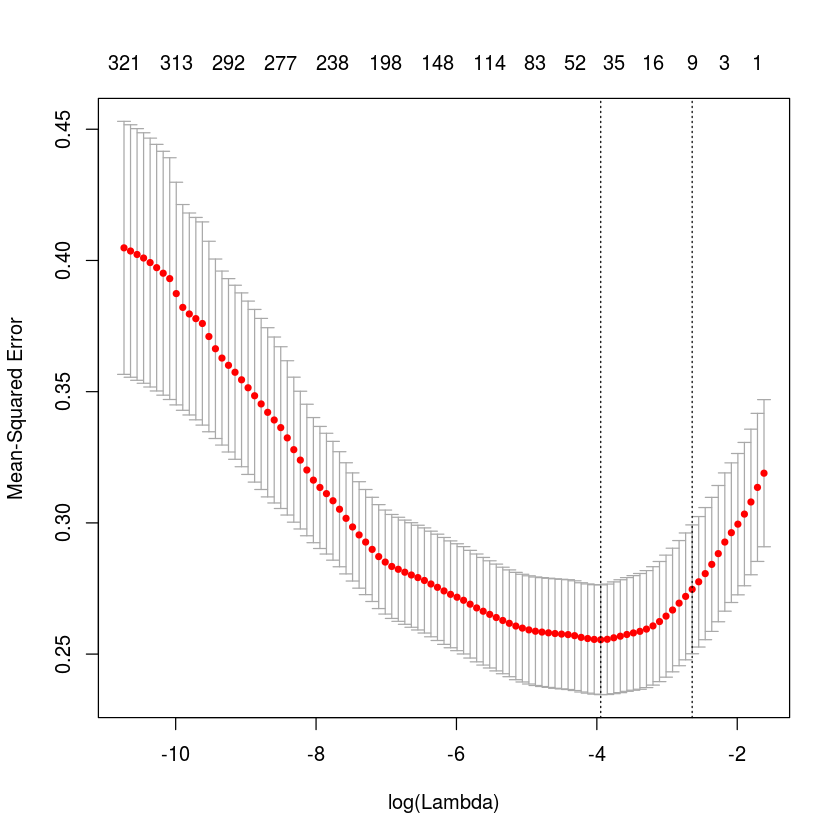

In [42]:
plot(lasso.cv)

(c) Let’s use the 1-standard-error rule to pick the tuning parameter $λ$. Set

```R
my.lambda = lasso.cv$lambda.1se
```

Print the value of the `my.lambda`.

In [43]:
my.lambda = lasso.cv$lambda.1se
my.lambda

[1] 0.07120946

(d) Display the predictors with non-zero coefficients via

```R
nonzero = predict(lasso.cv, s="lambda.1se", type="nonzero")
colnames(train.X)[nonzero]
```

Out of the 323 original predictors, how many have non-zero coefficients?

In [47]:
nonzero = predict(lasso.cv, type="nonzero", s='lambda.1se')
dim(nonzero)

# colnames(train.X)[nonzero]
# error: invalid subscript type 'list'
colnames(train.X)[as.numeric(unlist(nonzero))]

# 9 non-zero coefficients
colnames(train.X)[nonzero[,]]

[1] 9 1

[1] "Onset.Delta"            "sd.alsfrs.score"        "alsfrs.score.slope"    
[4] "last.speech"            "fvc.liters.slope"       "min.slope.alsfrs.score"
[7] "sum.slope.alsfrs.score" "min.slope.speech"       "sum.slope.speech"

[1] "Onset.Delta"            "sd.alsfrs.score"        "alsfrs.score.slope"    
[4] "last.speech"            "fvc.liters.slope"       "min.slope.alsfrs.score"
[7] "sum.slope.alsfrs.score" "min.slope.speech"       "sum.slope.speech"

(e) Compute the test `RMSE` for the model fit in part (b), using the regularization parameter chosen in part (c).

Note that it performs significantly better than the linear regression from Homework 1 (which had an `RMSE` of 0.7527). In the ALS Prediction Prize4Life Challenge mentioned in Homework 1, the test error from the Lasso model alone already yielded a very competitive score for the challenge!

In [48]:
lasso.test.pred = predict(lasso.cv, as.matrix(test.X), s='lambda.1se')
sqrt(mean((lasso.test.pred - test.y)^2))

[1] 0.5269457

In [17]:
# wrong
tx = model.matrix(test.y~., test.X)
lasso.pred = predict(lasso.mod, s=bestlam, newx=tx)
mean((lasso.pred-test.y)^2)

[1] 0.2781401

(f) Repeat parts (a,d,e) using ridge regression instead of the Lasso. Set again the seed to the value 2017 before calling `cv.glmnet()`. Store the result of cv.glmnet() in a variable called ridge.cv. Comment on your findings.

In [50]:
set.seed(2017)
ridge.cv = cv.glmnet(x=as.matrix(train.X), y=train.y, alpha=0)

nonzero.ridge = predict(ridge.cv, s='lambda.1se', type ='nonzero')
colnames(train.X)[nonzero.ridge[,]]

ridge.test.pred = predict(ridge.cv, as.matrix(test.X), s='lambda.1se')
sqrt(mean((ridge.test.pred - test.y)^2))

[1] "Onset.Delta"                       "Symptom.Speech"                   
  [3] "Symptom.WEAKNESS"                  "Site.of.Onset.Onset..Bulbar"      
  [5] "Site.of.Onset.Onset..Limb"         "Race...Caucasian"                 
  [7] "Age"                               "Sex.Female"                       
  [9] "Sex.Male"                          "Mother"                           
 [11] "Family"                            "Study.Arm.PLACEBO"                
 [13] "Study.Arm.ACTIVE"                  "max.alsfrs.score"                 
 [15] "min.alsfrs.score"                  "last.alsfrs.score"                
 [17] "mean.alsfrs.score"                 "num.alsfrs.score.visits"          
 [19] "sum.alsfrs.score"                  "first.alsfrs.score.date"          
 [21] "last.alsfrs.score.date"            "meansquares.alsfrs.score"         
 [23] "sd.alsfrs.score"                   "alsfrs.score.slope"               
 [25] "max.speech"                        "min.speech"                       
 [27] "last.speech"                       "mean.speech"                      
 [29] "sum.speech"                        "meansquares.speech"               
 [31] "sd.speech"                         "speech.slope"                     
 [33] "max.salivation"                    "min.salivation"                   
 [35] "last.salivation"                   "mean.salivation"                  
 [37] "sum.salivation"                    "meansquares.salivation"           
 [39] "sd.salivation"                     "salivation.slope"                 
 [41] "max.swallowing"                    "min.swallowing"                   
 [43] "last.swallowing"                   "mean.swallowing"                  
 [45] "sum.swallowing"                    "meansquares.swallowing"           
 [47] "sd.swallowing"                     "swallowing.slope"                 
 [49] "max.handwriting"                   "min.handwriting"                  
 [51] "last.handwriting"                  "mean.handwriting"                 
 [53] "sum.handwriting"                   "meansquares.handwriting"          
 [55] "sd.handwriting"                    "handwriting.slope"                
 [57] "max.cutting"                       "min.cutting"                      
 [59] "last.cutting"                      "mean.cutting"                     
 [61] "sum.cutting"                       "meansquares.cutting"              
 [63] "sd.cutting"                        "cutting.slope"                    
 [65] "max.dressing"                      "min.dressing"                     
 [67] "last.dressing"                     "mean.dressing"                    
 [69] "sum.dressing"                      "meansquares.dressing"             
 [71] "sd.dressing"                       "dressing.slope"                   
 [73] "max.turning"                       "min.turning"                      
 [75] "last.turning"                      "mean.turning"                     
 [77] "sum.turning"                       "meansquares.turning"              
 [79] "sd.turning"                        "turning.slope"                    
 [81] "max.walking"                       "min.walking"                      
 [83] "last.walking"                      "mean.walking"                     
 [85] "sum.walking"                       "meansquares.walking"              
 [87] "sd.walking"                        "walking.slope"                    
 [89] "max.climbing.stairs"               "min.climbing.stairs"              
 [91] "last.climbing.stairs"              "mean.climbing.stairs"             
 [93] "sum.climbing.stairs"               "meansquares.climbing.stairs"      
 [95] "sd.climbing.stairs"                "climbing.stairs.slope"            
 [97] "max.fvc.liters"                    "min.fvc.liters"                   
 [99] "last.fvc.liters"                   "mean.fvc.liters"                  
[101] "num.fvc.liters.visits"             "sum.fvc.liters"                   
[103] "last.fvc.liters.d

[1] 0.5411721

In [49]:
# wrong

# x = model.matrix(train.y~., train.X)
# y = train.y

# ridge.mod = glmnet(x, y, alpha=0)

# set.seed(2017)
# ridge.cv = cv.glmnet(x, y, alpha=1)

# bestlam.ridge = ridge.cv$lambda.min
# bestlam.ridge

# ridge.coef = predict(ridge.mod, type="coefficients", s=bestlam.ridge)
# head(ridge.coef)

# my.lambda.ridge = ridge.cv$lambda.1se
# my.lambda.ridge

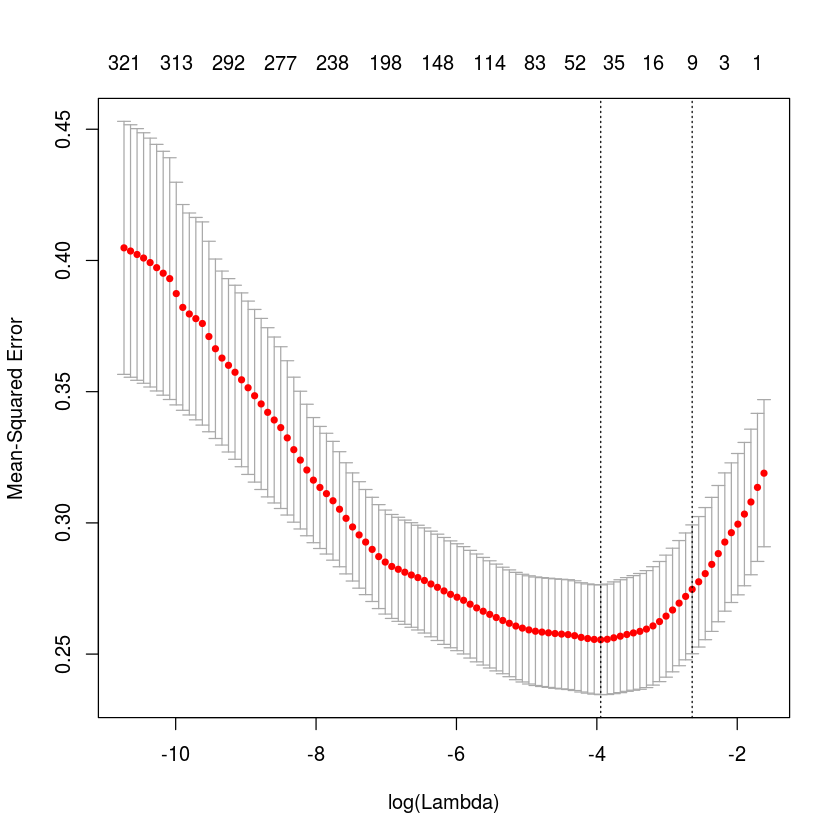

In [255]:
plot(ridge.cv)

<span style="color:blue">
Gyu-Ho's Answer: Above models in Ridge Regression and Lasso return **same best lambda value**. **Same number of non-zero coefficients**, *9*, according to `predict(type="nonzero")` results. However, ridge regression coefficients in training data are only shrunken towards zero, while all variables are still included in the model. Lasso performs variable selection, with coefficients being estimated exactly to zero, thus easier to interpret. On this test data, Lass has less `RMSE`, thus performs better.
</span>

<span style="color:red">
All 323 predictors are nonzero. This is not surprising, as ridge regression does not induce sparse models. The RMSE is 0.541, which is very similar to the lasso RMSE.
</span>